In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
student_df = pd.read_csv('Predict students dropout, academic success.csv')

In [3]:
student_df.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate


In [4]:
student_df.tail(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.0,0,9.4,-0.8,-3.12,Graduate
4423,1,5,1,15,1,1,9,23,27,6,...,0,6,6,6,13.0,0,12.7,3.7,-1.70,Graduate


In [5]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [6]:
student_df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [7]:
student_df.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)

In [8]:
student_df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployme

In [9]:
student_df = student_df.drop(['Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)', # Added a comma here
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
                             'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (grade)',
'Curricular units 2nd sem (without evaluations)',
                              'Nationality',
                              'Father\'s occupation'], axis = 1)

In [10]:
student_df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age', 'International', 'Curricular units 2nd sem (approved)',
       'Unemployment rate', 'Inflation rate', 'GDP', 'Target'],
      dtype='object')

In [11]:
student_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Displaced,...,Tuition fees up to date,Gender,Scholarship holder,Age,International,Curricular units 2nd sem (approved),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,13,10,6,1,...,1,1,0,20,0,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,3,4,1,...,0,1,0,19,0,6,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,22,27,10,1,...,0,1,0,19,0,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,23,27,6,1,...,1,0,0,20,0,5,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,22,28,10,0,...,1,0,0,45,0,6,13.9,-0.3,0.79,Graduate


In [12]:
student_df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age', 'International', 'Curricular units 2nd sem (approved)',
       'Unemployment rate', 'Inflation rate', 'GDP', 'Target'],
      dtype='object')

In [13]:
student_df.nunique()

,0
Marital status,6
Application mode,18
Application order,8
Course,17
Daytime/evening attendance,2
Previous qualification,17
Mother's qualification,29
Father's qualification,34
Mother's occupation,32
Displaced,2


In [14]:
student_df.shape

(4424, 22)

In [15]:
student_df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Displaced,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age,International,Curricular units 2nd sem (approved),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,12.322107,16.455244,7.317812,0.548373,...,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,4.435805,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,9.026251,11.044800,3.997828,0.497711,...,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,3.014764,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,2.000000,3.000000,5.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,2.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,13.000000,14.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,5.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,22.000000,27.000000,10.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,6.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,29.000000,34.000000,32.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,16.200000,3.700000,3.510000


In [16]:
student_df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0
Displaced,0


In [17]:
print(student_df.nunique())

Marital status                          6
Application mode                       18
Application order                       8
Course                                 17
Daytime/evening attendance              2
Previous qualification                 17
Mother's qualification                 29
Father's qualification                 34
Mother's occupation                    32
Displaced                               2
Educational special needs               2
Debtor                                  2
Tuition fees up to date                 2
Gender                                  2
Scholarship holder                      2
Age                                    46
International                           2
Curricular units 2nd sem (approved)    20
Unemployment rate                      10
Inflation rate                          9
GDP                                    10
Target                                  3
dtype: int64


In [18]:
student_df.duplicated().sum()

8

In [19]:
student_df['Marital status'].value_counts()

,count
Marital status,
1,3919
2,379
4,91
5,25
6,6
3,4


In [20]:
student_df['Application mode'].value_counts()

,count
Application mode,
1,1708
8,872
12,785
14,312
15,213
4,139
9,124
13,77
16,59


In [21]:
student_df['Course'].value_counts()

,count
Course,
12,766
9,380
10,355
6,337
15,331
14,268
17,268
11,252
5,226


In [22]:
student_df['International'].value_counts()

,count
International,
0,4314
1,110


In [23]:
student_df['Age'].value_counts()

,count
Age,
18,1036
19,911
20,599
21,322
22,174
24,131
23,108
26,94
25,93


In [24]:
student_df['Unemployment rate'].value_counts()

,count
Unemployment rate,
7.6,571
9.4,533
10.8,525
12.4,445
12.7,419
11.1,414
15.5,397
13.9,390
8.9,368


In [25]:
student_df['Gender'].value_counts()

,count
Gender,
0,2868
1,1556


In [26]:
student_df['Scholarship holder'].value_counts()

,count
Scholarship holder,
0,3325
1,1099


In [27]:
student_df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


In [28]:
student_df['Debtor'].value_counts()

,count
Debtor,
0,3921
1,503


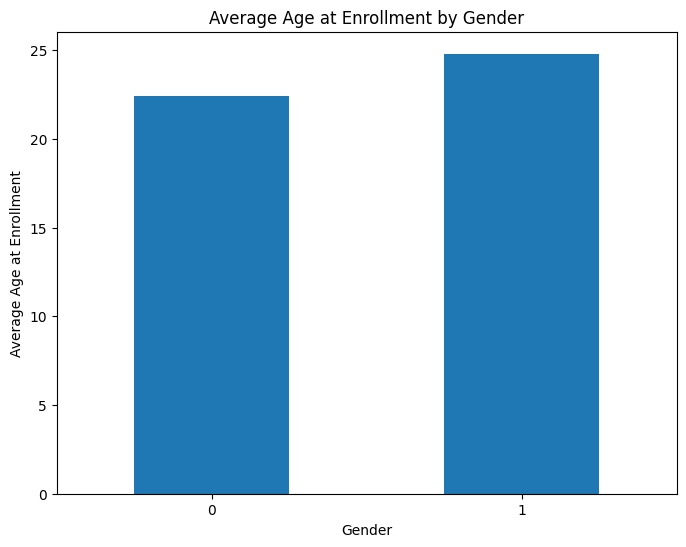

In [29]:
plt.figure(figsize=(8, 6))
student_df.groupby('Gender')['Age'].mean().plot(kind='bar')
plt.title('Average Age at Enrollment by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age at Enrollment')
plt.xticks(rotation=0)
plt.show()
plt.show()

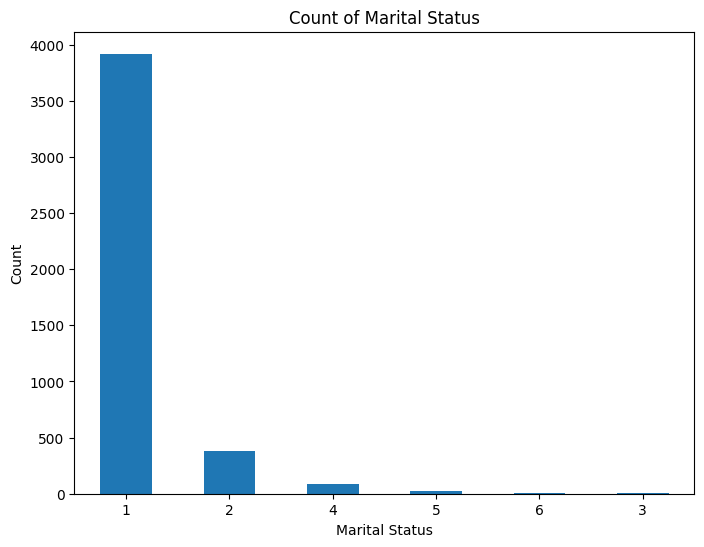

In [30]:
plt.figure(figsize=(8, 6))
student_df['Marital status'].value_counts().plot(kind='bar')
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

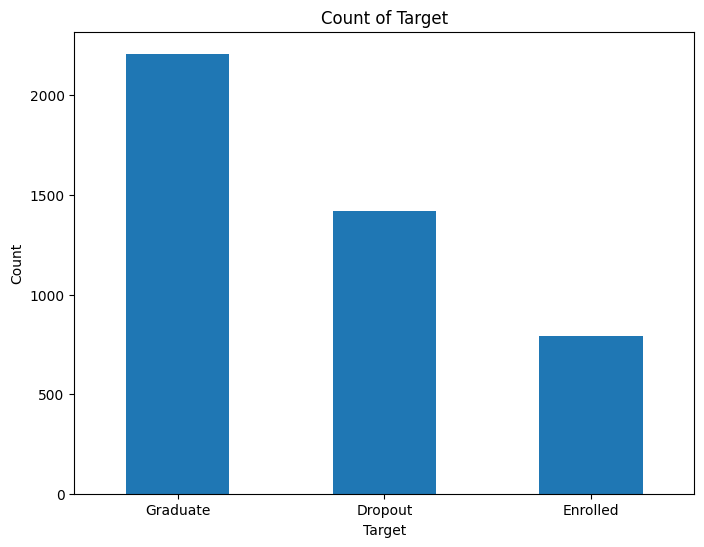

In [31]:
plt.figure(figsize=(8, 6))
student_df['Target'].value_counts().plot(kind='bar')
plt.title('Count of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

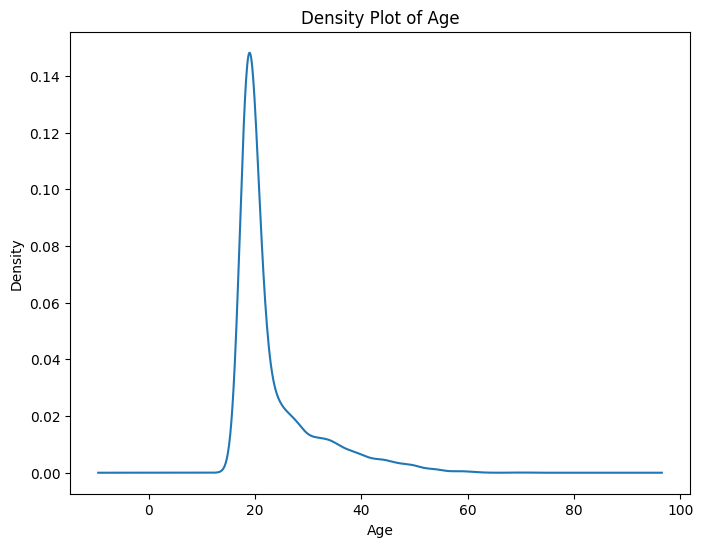

In [32]:
plt.figure(figsize=(8, 6))
student_df['Age'].plot(kind='density')
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.show()

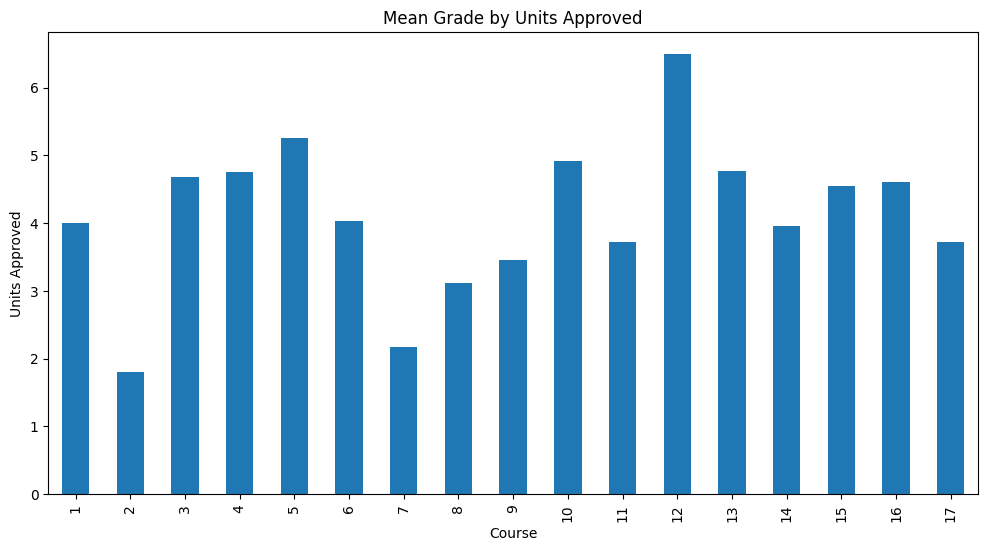

In [33]:
mean_grade_by_course = student_df.groupby('Course')['Curricular units 2nd sem (approved)'].mean()
# Create a bar chart for mean grade by course
plt.figure(figsize=(12, 6))
mean_grade_by_course.plot(kind='bar')
plt.title('Mean Grade by Units Approved')
plt.xlabel('Course')
plt.ylabel('Units Approved')
plt.xticks(rotation=90)
plt.show()

In [34]:
student_df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age', 'International', 'Curricular units 2nd sem (approved)',
       'Unemployment rate', 'Inflation rate', 'GDP', 'Target'],
      dtype='object')

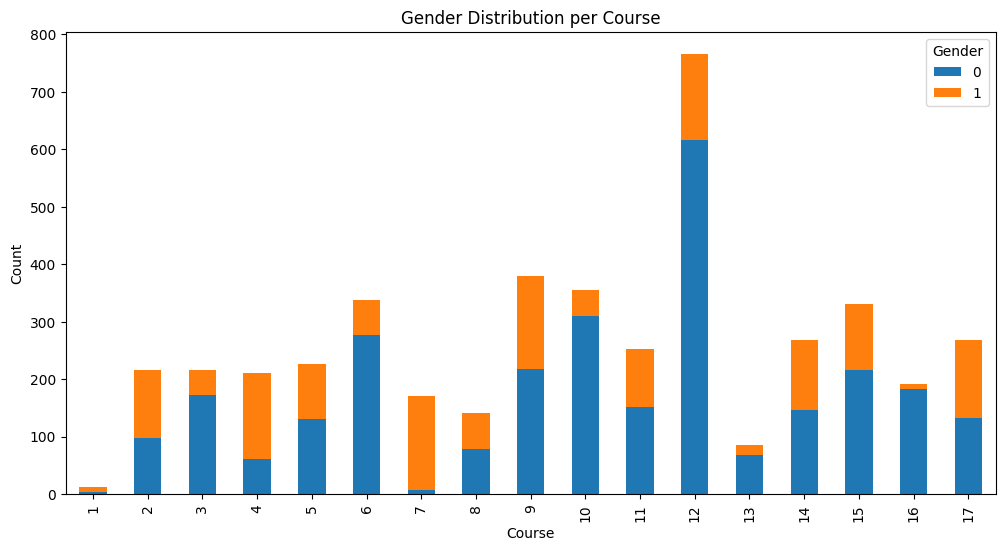

In [35]:
gender_distribution_per_course = student_df.groupby(['Course', 'Gender']).size().unstack()
# Create a bar chart for gender distribution per course
gender_distribution_per_course.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Gender Distribution per Course')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.show()

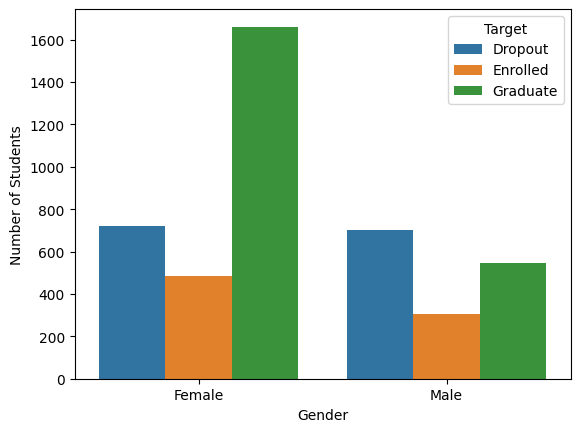

In [36]:
sns.countplot(data=student_df, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

In [37]:
student_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.0,1.00,1.00,6.00
Application mode,4424.0,6.886980,5.298964,1.00,1.0,8.00,12.00,18.00
Application order,4424.0,1.727848,1.313793,0.00,1.0,1.00,2.00,9.00
Course,4424.0,9.899186,4.331792,1.00,6.0,10.00,13.00,17.00
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.0,1.00,1.00,1.00
Previous qualification,4424.0,2.531420,3.963707,1.00,1.0,1.00,1.00,17.00
Mother's qualification,4424.0,12.322107,9.026251,1.00,2.0,13.00,22.00,29.00
Father's qualification,4424.0,16.455244,11.044800,1.00,3.0,14.00,27.00,34.00
Mother's occupation,4424.0,7.317812,3.997828,1.00,5.0,6.00,10.00,32.00
Displaced,4424.0,0.548373,0.497711,0.00,0.0,1.00,1.00,1.00


In [38]:
student_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Marital status,4424.0,NaN,NaN,NaN,1.178571,0.605747,1.0,1.0,1.0,1.0,6.0
Application mode,4424.0,NaN,NaN,NaN,6.88698,5.298964,1.0,1.0,8.0,12.0,18.0
Application order,4424.0,NaN,NaN,NaN,1.727848,1.313793,0.0,1.0,1.0,2.0,9.0
Course,4424.0,NaN,NaN,NaN,9.899186,4.331792,1.0,6.0,10.0,13.0,17.0
Daytime/evening attendance,4424.0,NaN,NaN,NaN,0.890823,0.311897,0.0,1.0,1.0,1.0,1.0
Previous qualification,4424.0,NaN,NaN,NaN,2.53142,3.963707,1.0,1.0,1.0,1.0,17.0
Mother's qualification,4424.0,NaN,NaN,NaN,12.322107,9.026251,1.0,2.0,13.0,22.0,29.0
Father's qualification,4424.0,NaN,NaN,NaN,16.455244,11.0448,1.0,3.0,14.0,27.0,34.0
Mother's occupation,4424.0,NaN,NaN,NaN,7.317812,3.997828,1.0,5.0,6.0,10.0,32.0
Displaced,4424.0,NaN,NaN,NaN,0.548373,0.497711,0.0,0.0,1.0,1.0,1.0


In [39]:
cat_cols=student_df.select_dtypes(include=['object']).columns
num_cols = student_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Target'], dtype='object')
Numerical Variables:
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', "Mother's qualification", "Father's qualification", "Mother's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age', 'International', 'Curricular units 2nd sem (approved)', 'Unemployment rate', 'Inflation rate', 'GDP']


Marital status
Skew : 4.4


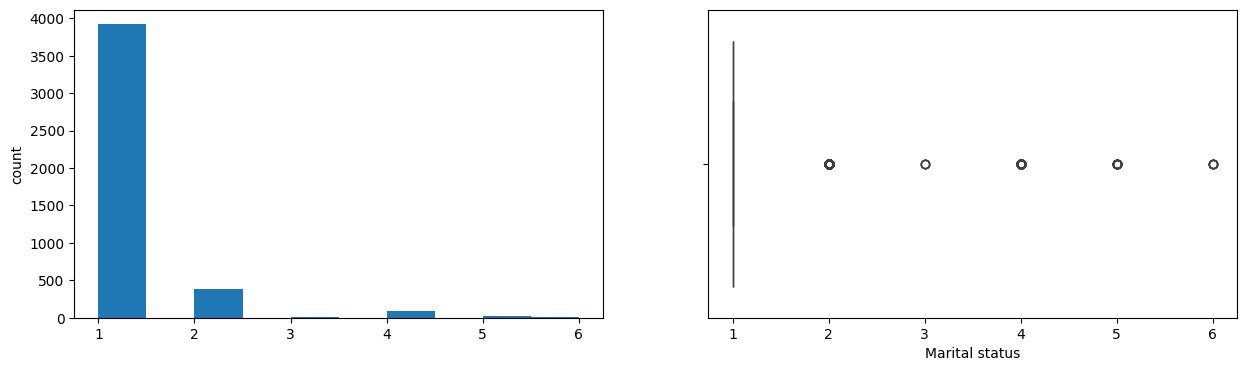

Application mode
Skew : 0.12


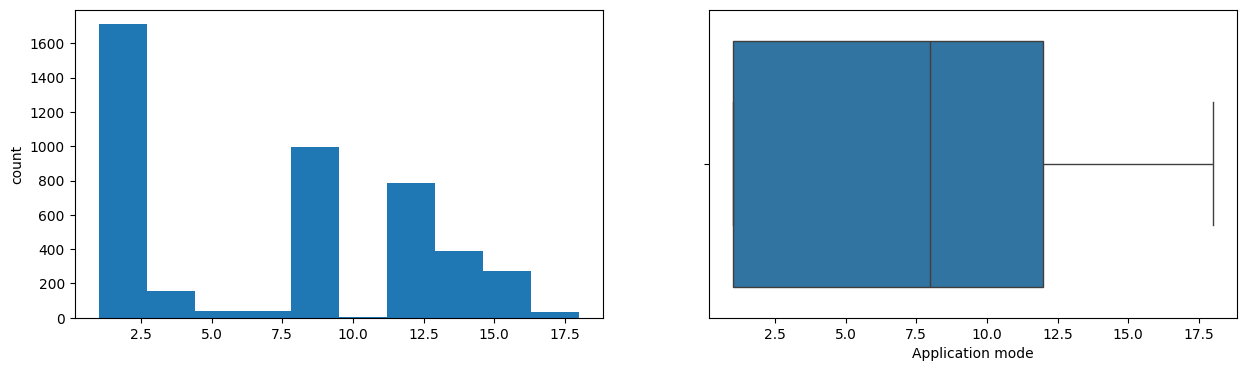

Application order
Skew : 1.88


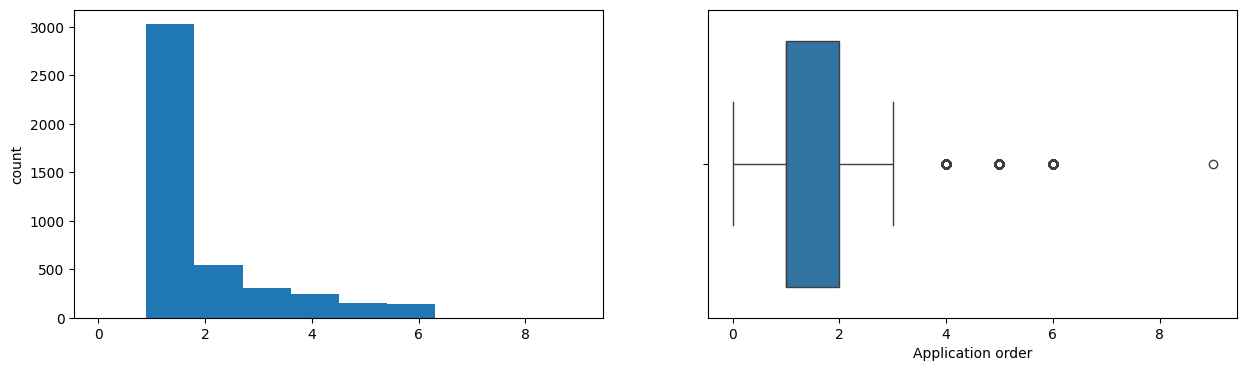

Course
Skew : -0.19


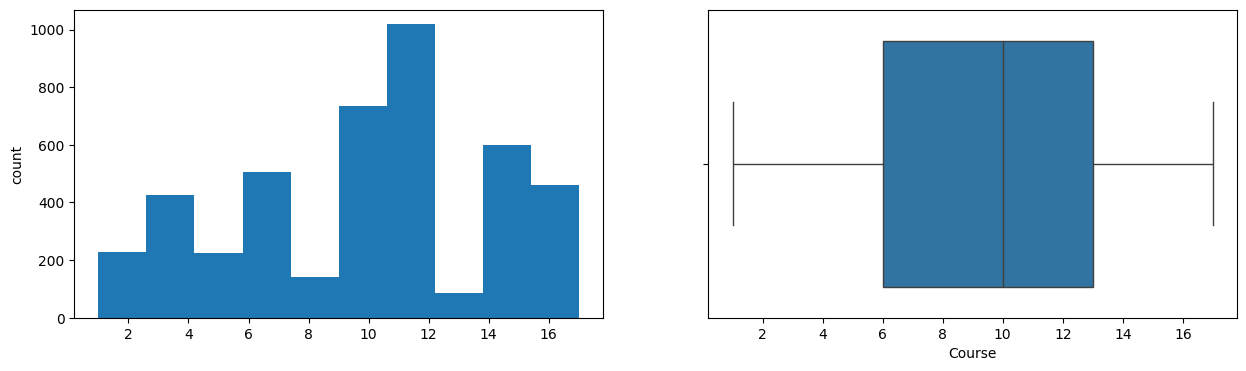

Daytime/evening attendance
Skew : -2.51


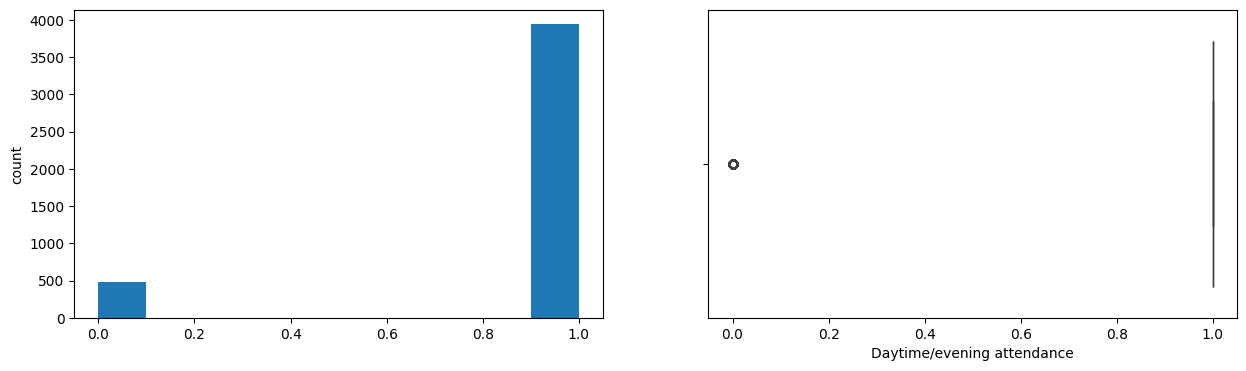

Previous qualification
Skew : 2.41


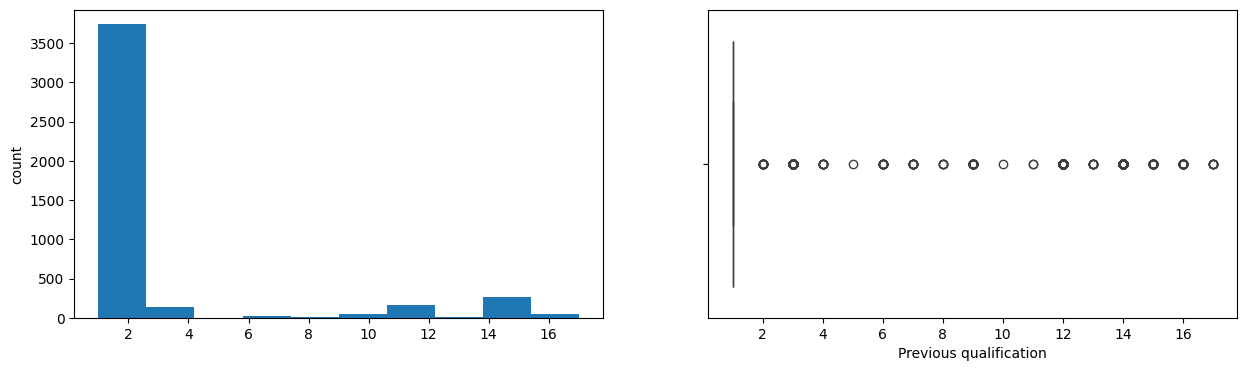

Mother's qualification
Skew : -0.1


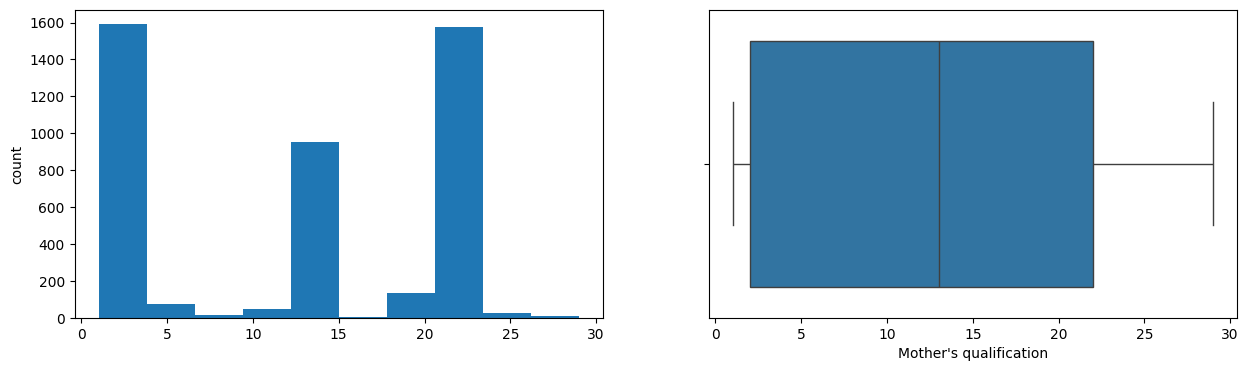

Father's qualification
Skew : -0.29


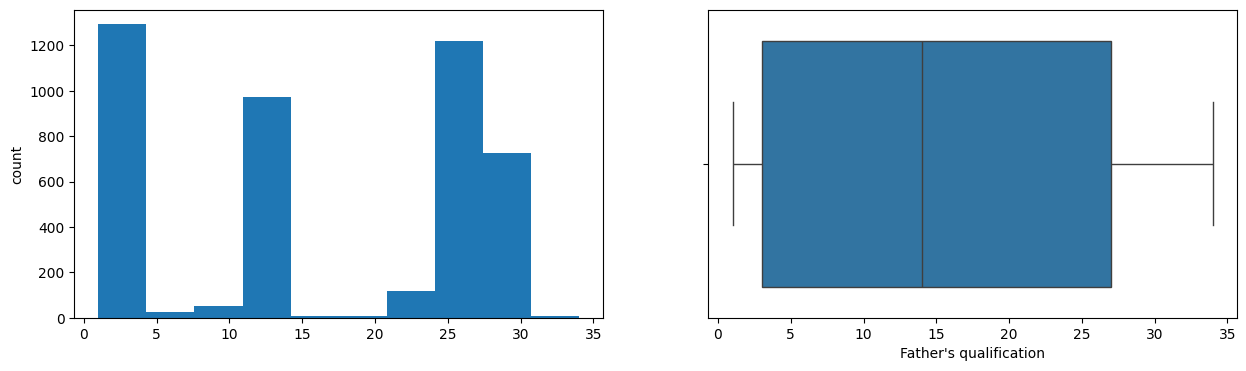

Mother's occupation
Skew : 2.23


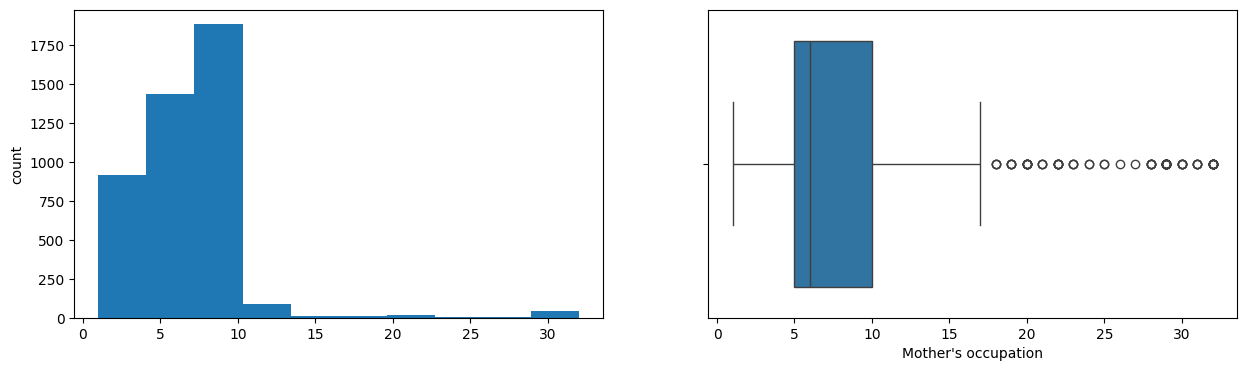

Displaced
Skew : -0.19


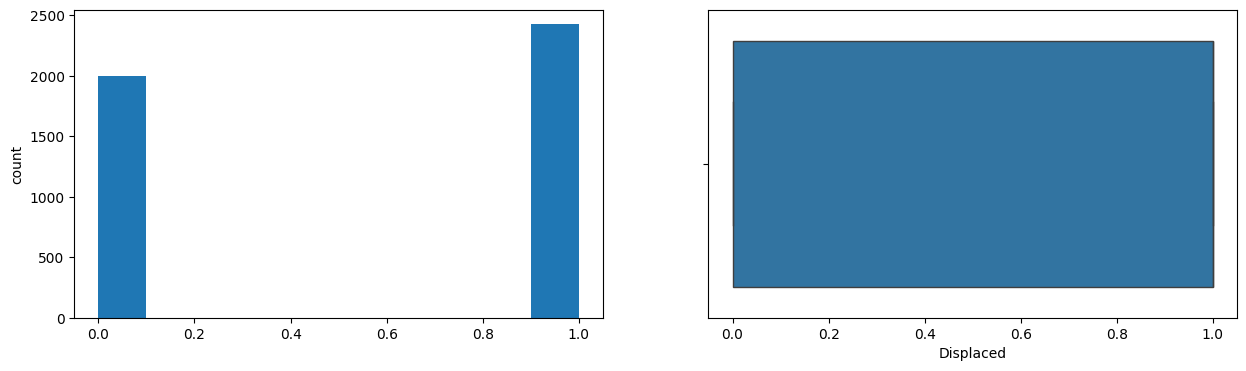

Educational special needs
Skew : 9.15


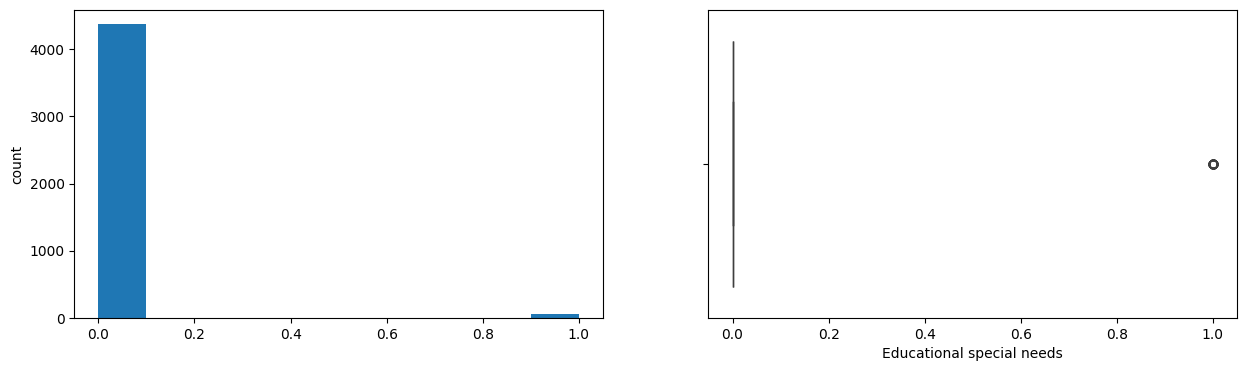

Debtor
Skew : 2.43


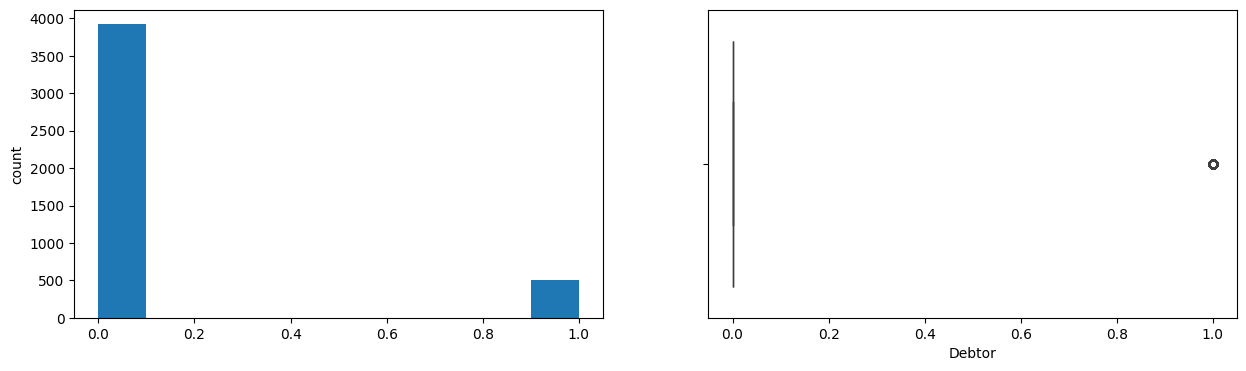

Tuition fees up to date
Skew : -2.35


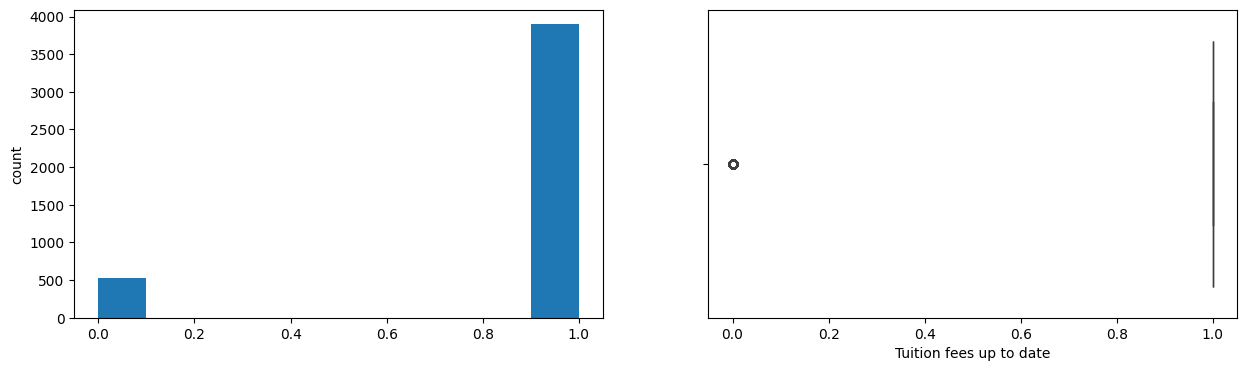

Gender
Skew : 0.62


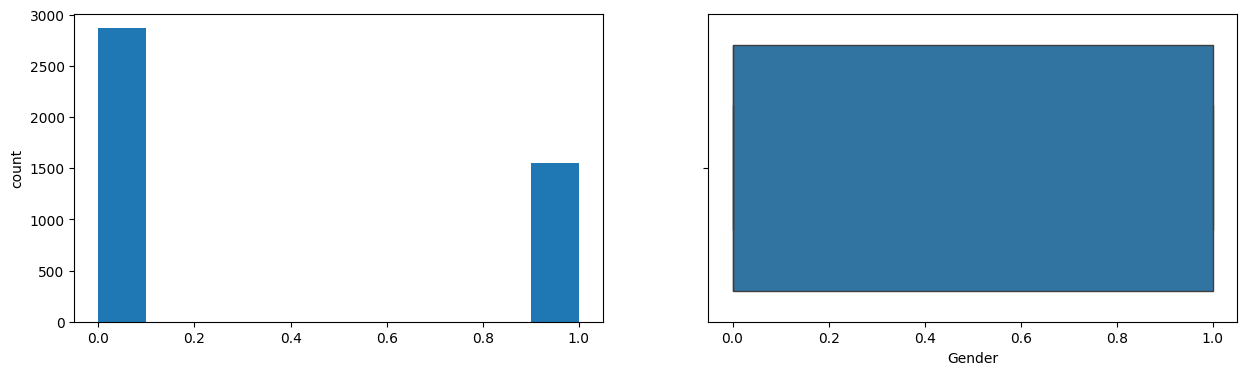

Scholarship holder
Skew : 1.16


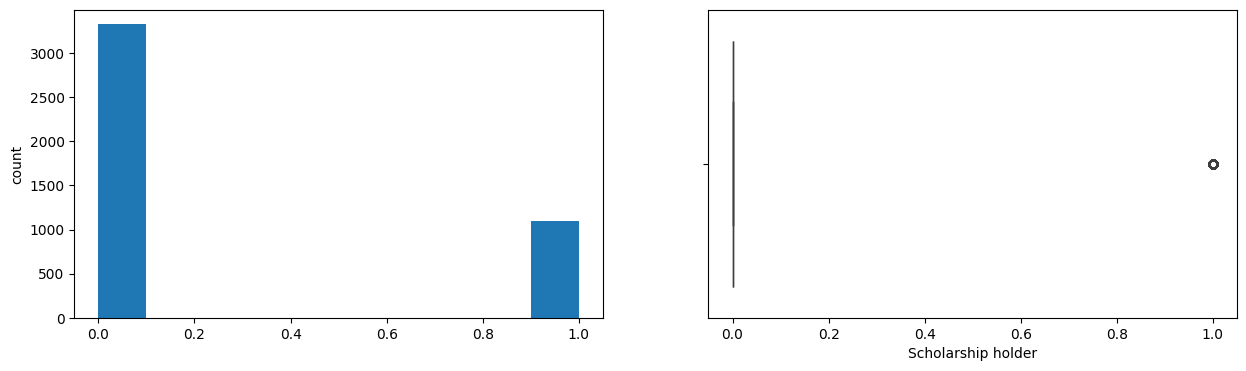

Age
Skew : 2.05


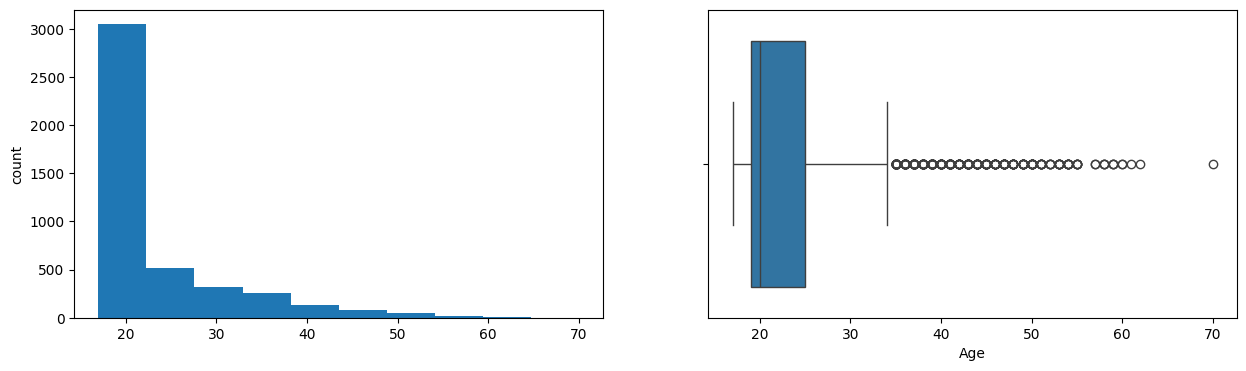

International
Skew : 6.1


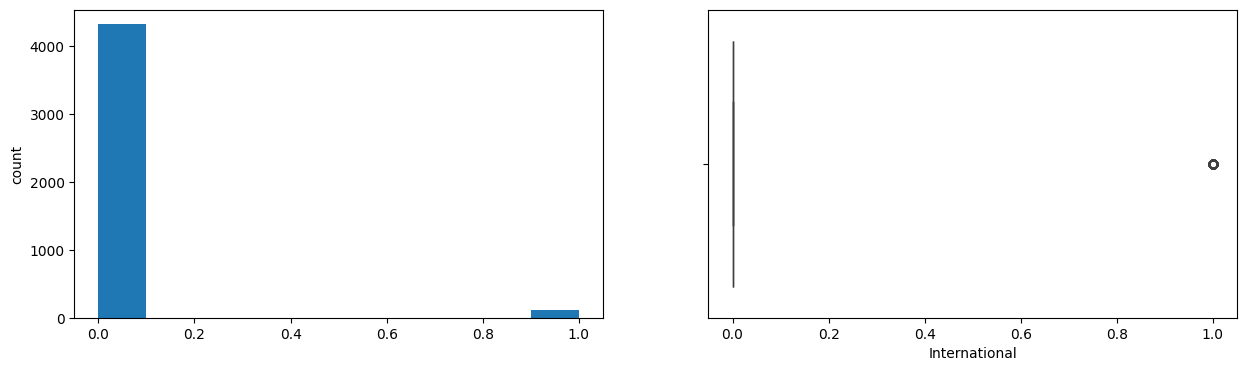

Curricular units 2nd sem (approved)
Skew : 0.31


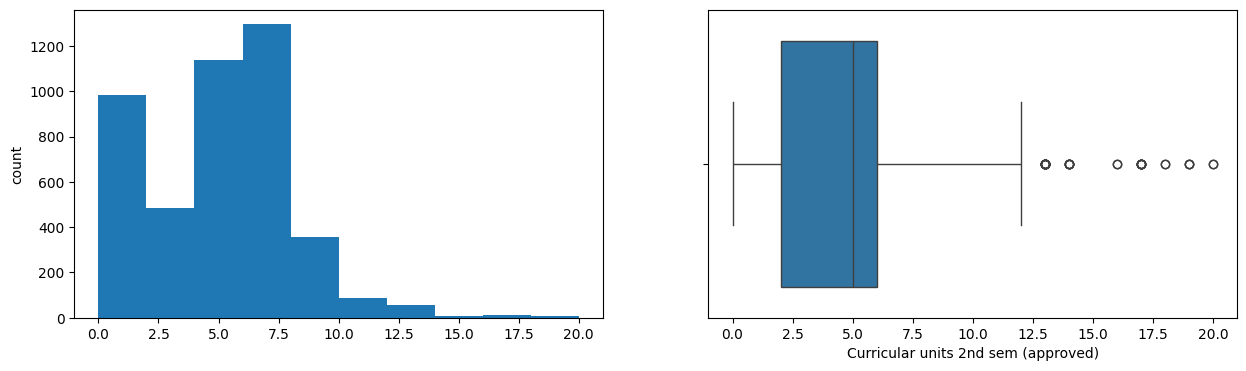

Unemployment rate
Skew : 0.21


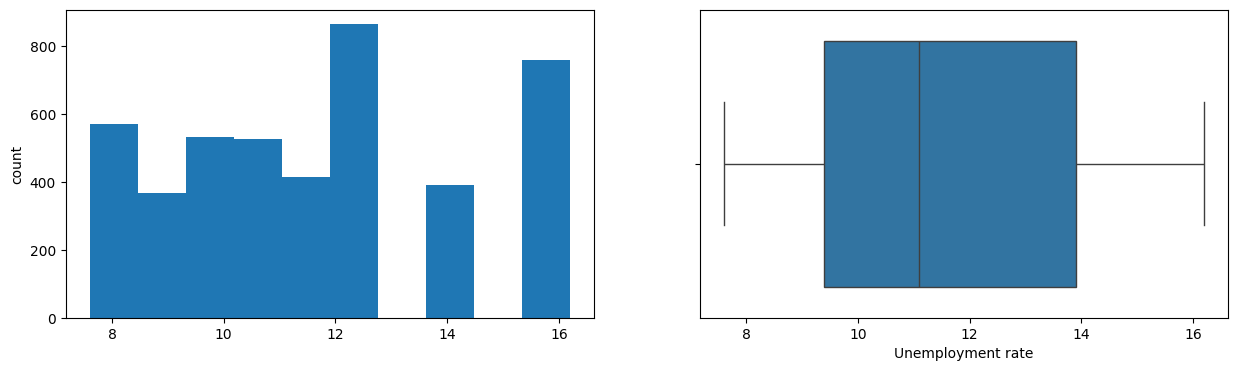

Inflation rate
Skew : 0.25


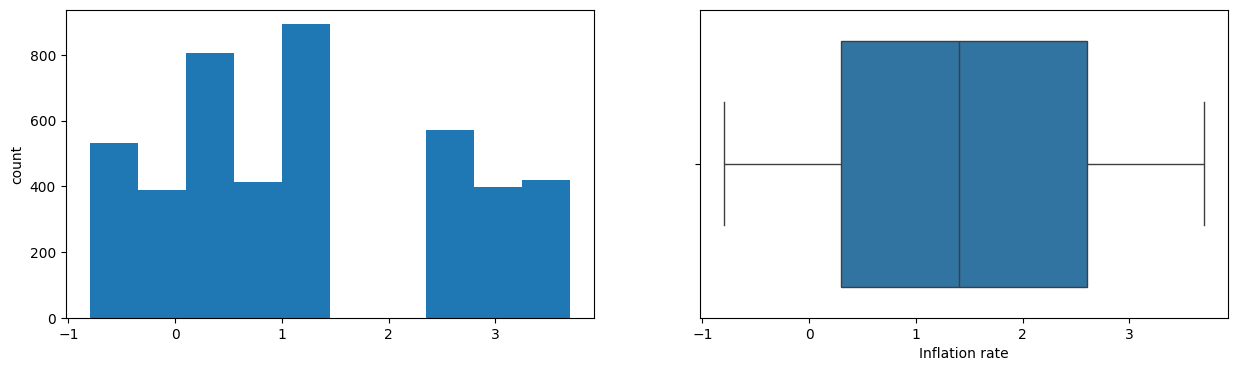

GDP
Skew : -0.39


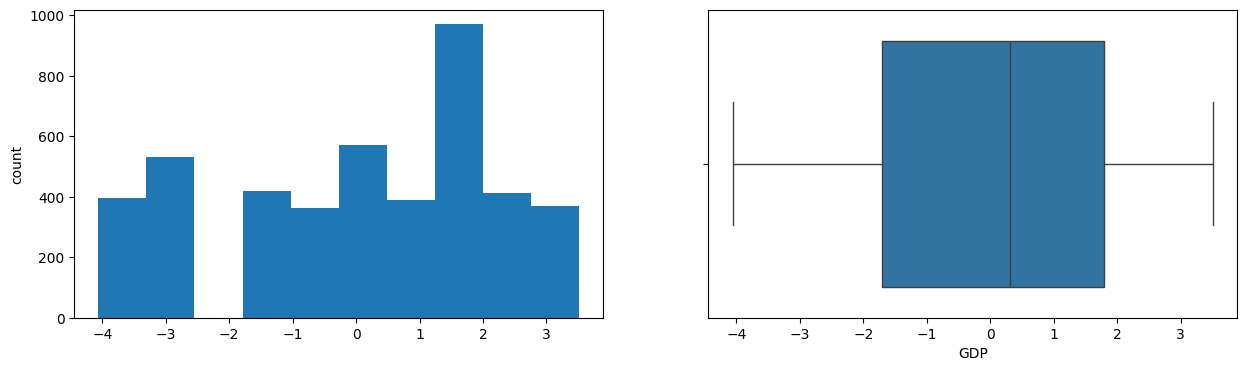

In [40]:
for col in num_cols:
    print(col)
    print('Skew :', round(student_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    student_df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=student_df[col])
    plt.show()

<Axes: xlabel='Target', ylabel='count'>

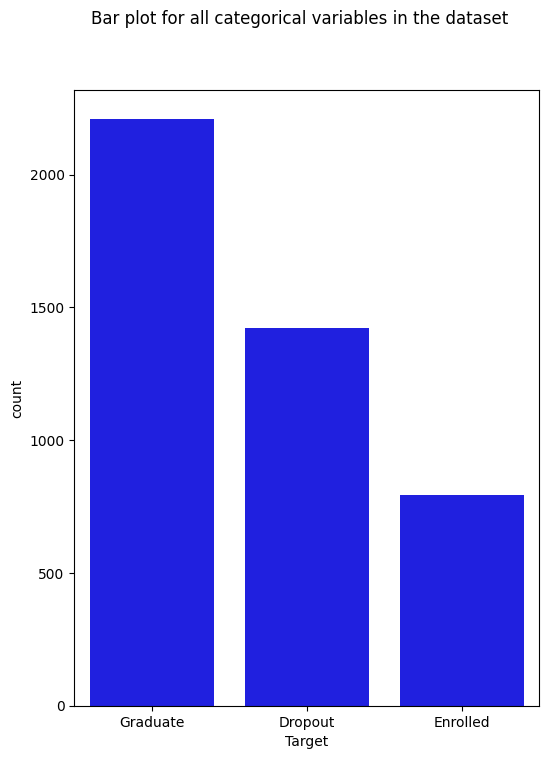

In [41]:
fig, ax = plt.subplots(figsize = (6, 8)) # Change axes to ax
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = ax, x = 'Target', data = student_df, color = 'blue', order = student_df['Target'].value_counts().index) # Use ax instead of axes[0,0]

#Based on obsevations, students those who graduate is the highest number over 2000 observations. with a least numbers are enrolled. where the dropout gradutes numbers are around 1500.

In [42]:
for col in num_cols:
    print(f"Column: {col}, Data type: {student_df[col].dtype}")

Column: Marital status, Data type: int64
Column: Application mode, Data type: int64
Column: Application order, Data type: int64
Column: Course, Data type: int64
Column: Daytime/evening attendance, Data type: int64
Column: Previous qualification, Data type: int64
Column: Mother's qualification, Data type: int64
Column: Father's qualification, Data type: int64
Column: Mother's occupation, Data type: int64
Column: Displaced, Data type: int64
Column: Educational special needs, Data type: int64
Column: Debtor, Data type: int64
Column: Tuition fees up to date, Data type: int64
Column: Gender, Data type: int64
Column: Scholarship holder, Data type: int64
Column: Age, Data type: int64
Column: International, Data type: int64
Column: Curricular units 2nd sem (approved), Data type: int64
Column: Unemployment rate, Data type: float64
Column: Inflation rate, Data type: float64
Column: GDP, Data type: float64


In [43]:
student_df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age', 'International', 'Curricular units 2nd sem (approved)',
       'Unemployment rate', 'Inflation rate', 'GDP', 'Target'],
      dtype='object')

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'student_df' is your DataFrame and you want to scale only numerical columns
student_df_num_cols = student_df.select_dtypes(include=['float', 'int']).columns
scaler = MinMaxScaler()
student_df_normalized = pd.DataFrame(scaler.fit_transform(student_df[student_df_num_cols]))
student_df_normalized

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.411765,0.555556,0.0625,1.0,0.0,0.428571,0.272727,0.161290,1.0,...,0.0,1.0,1.0,0.0,0.056604,0.0,0.00,0.372093,0.488889,0.766182
1,0.0,0.294118,0.111111,0.6250,1.0,0.0,0.000000,0.060606,0.096774,1.0,...,0.0,0.0,1.0,0.0,0.037736,0.0,0.30,0.732558,0.111111,0.640687
2,0.0,0.000000,0.555556,0.2500,1.0,0.0,0.750000,0.787879,0.290323,1.0,...,0.0,0.0,1.0,0.0,0.037736,0.0,0.00,0.372093,0.488889,0.766182
3,0.0,0.411765,0.222222,0.8750,1.0,0.0,0.785714,0.787879,0.161290,1.0,...,0.0,1.0,0.0,0.0,0.056604,0.0,0.25,0.209302,0.000000,0.124174
4,0.2,0.647059,0.111111,0.1250,0.0,0.0,0.750000,0.818182,0.290323,0.0,...,0.0,1.0,0.0,0.0,0.528302,0.0,0.30,0.732558,0.111111,0.640687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.0,0.000000,0.666667,0.8750,1.0,0.0,0.000000,0.000000,0.161290,0.0,...,0.0,1.0,1.0,0.0,0.037736,0.0,0.25,0.918605,0.800000,0.000000
4420,0.0,0.000000,0.222222,0.8750,1.0,0.0,0.000000,0.000000,0.290323,1.0,...,1.0,0.0,0.0,0.0,0.018868,1.0,0.10,0.406977,0.311111,0.803170
4421,0.0,0.000000,0.111111,0.6875,1.0,0.0,0.750000,0.787879,0.290323,1.0,...,0.0,1.0,0.0,1.0,0.245283,0.0,0.05,0.732558,0.111111,0.640687
4422,0.0,0.000000,0.111111,0.5000,1.0,0.0,0.750000,0.787879,0.225806,1.0,...,0.0,1.0,0.0,1.0,0.056604,0.0,0.25,0.209302,0.000000,0.124174


In [45]:
from scipy.stats import skew

# Assuming the 'Target' column was the first column in the original DataFrame
target_skewness = skew(student_df_normalized.iloc[:, 0]) # Access the first column (index 0)

print(f"Skewness of the 'Target' column: {target_skewness}")

Skewness of the 'Target' column: 4.3982724264661766


In [46]:
from scipy.stats import skew

# Calculate skewness of the first column in the *original* DataFrame
# Assuming the 'Target' column is the first one
target_skewness_original = skew(student_df.iloc[:, 0])

print(f"Skewness of the 'Target' column in the original DataFrame: {target_skewness_original}")

Skewness of the 'Target' column in the original DataFrame: 4.398272426466177


In [47]:
student_df['Target'] = LabelEncoder().fit_transform(student_df['Target'])
student_df.loc[:,'Target'].value_counts()

,count
Target,
2,2209
0,1421
1,794


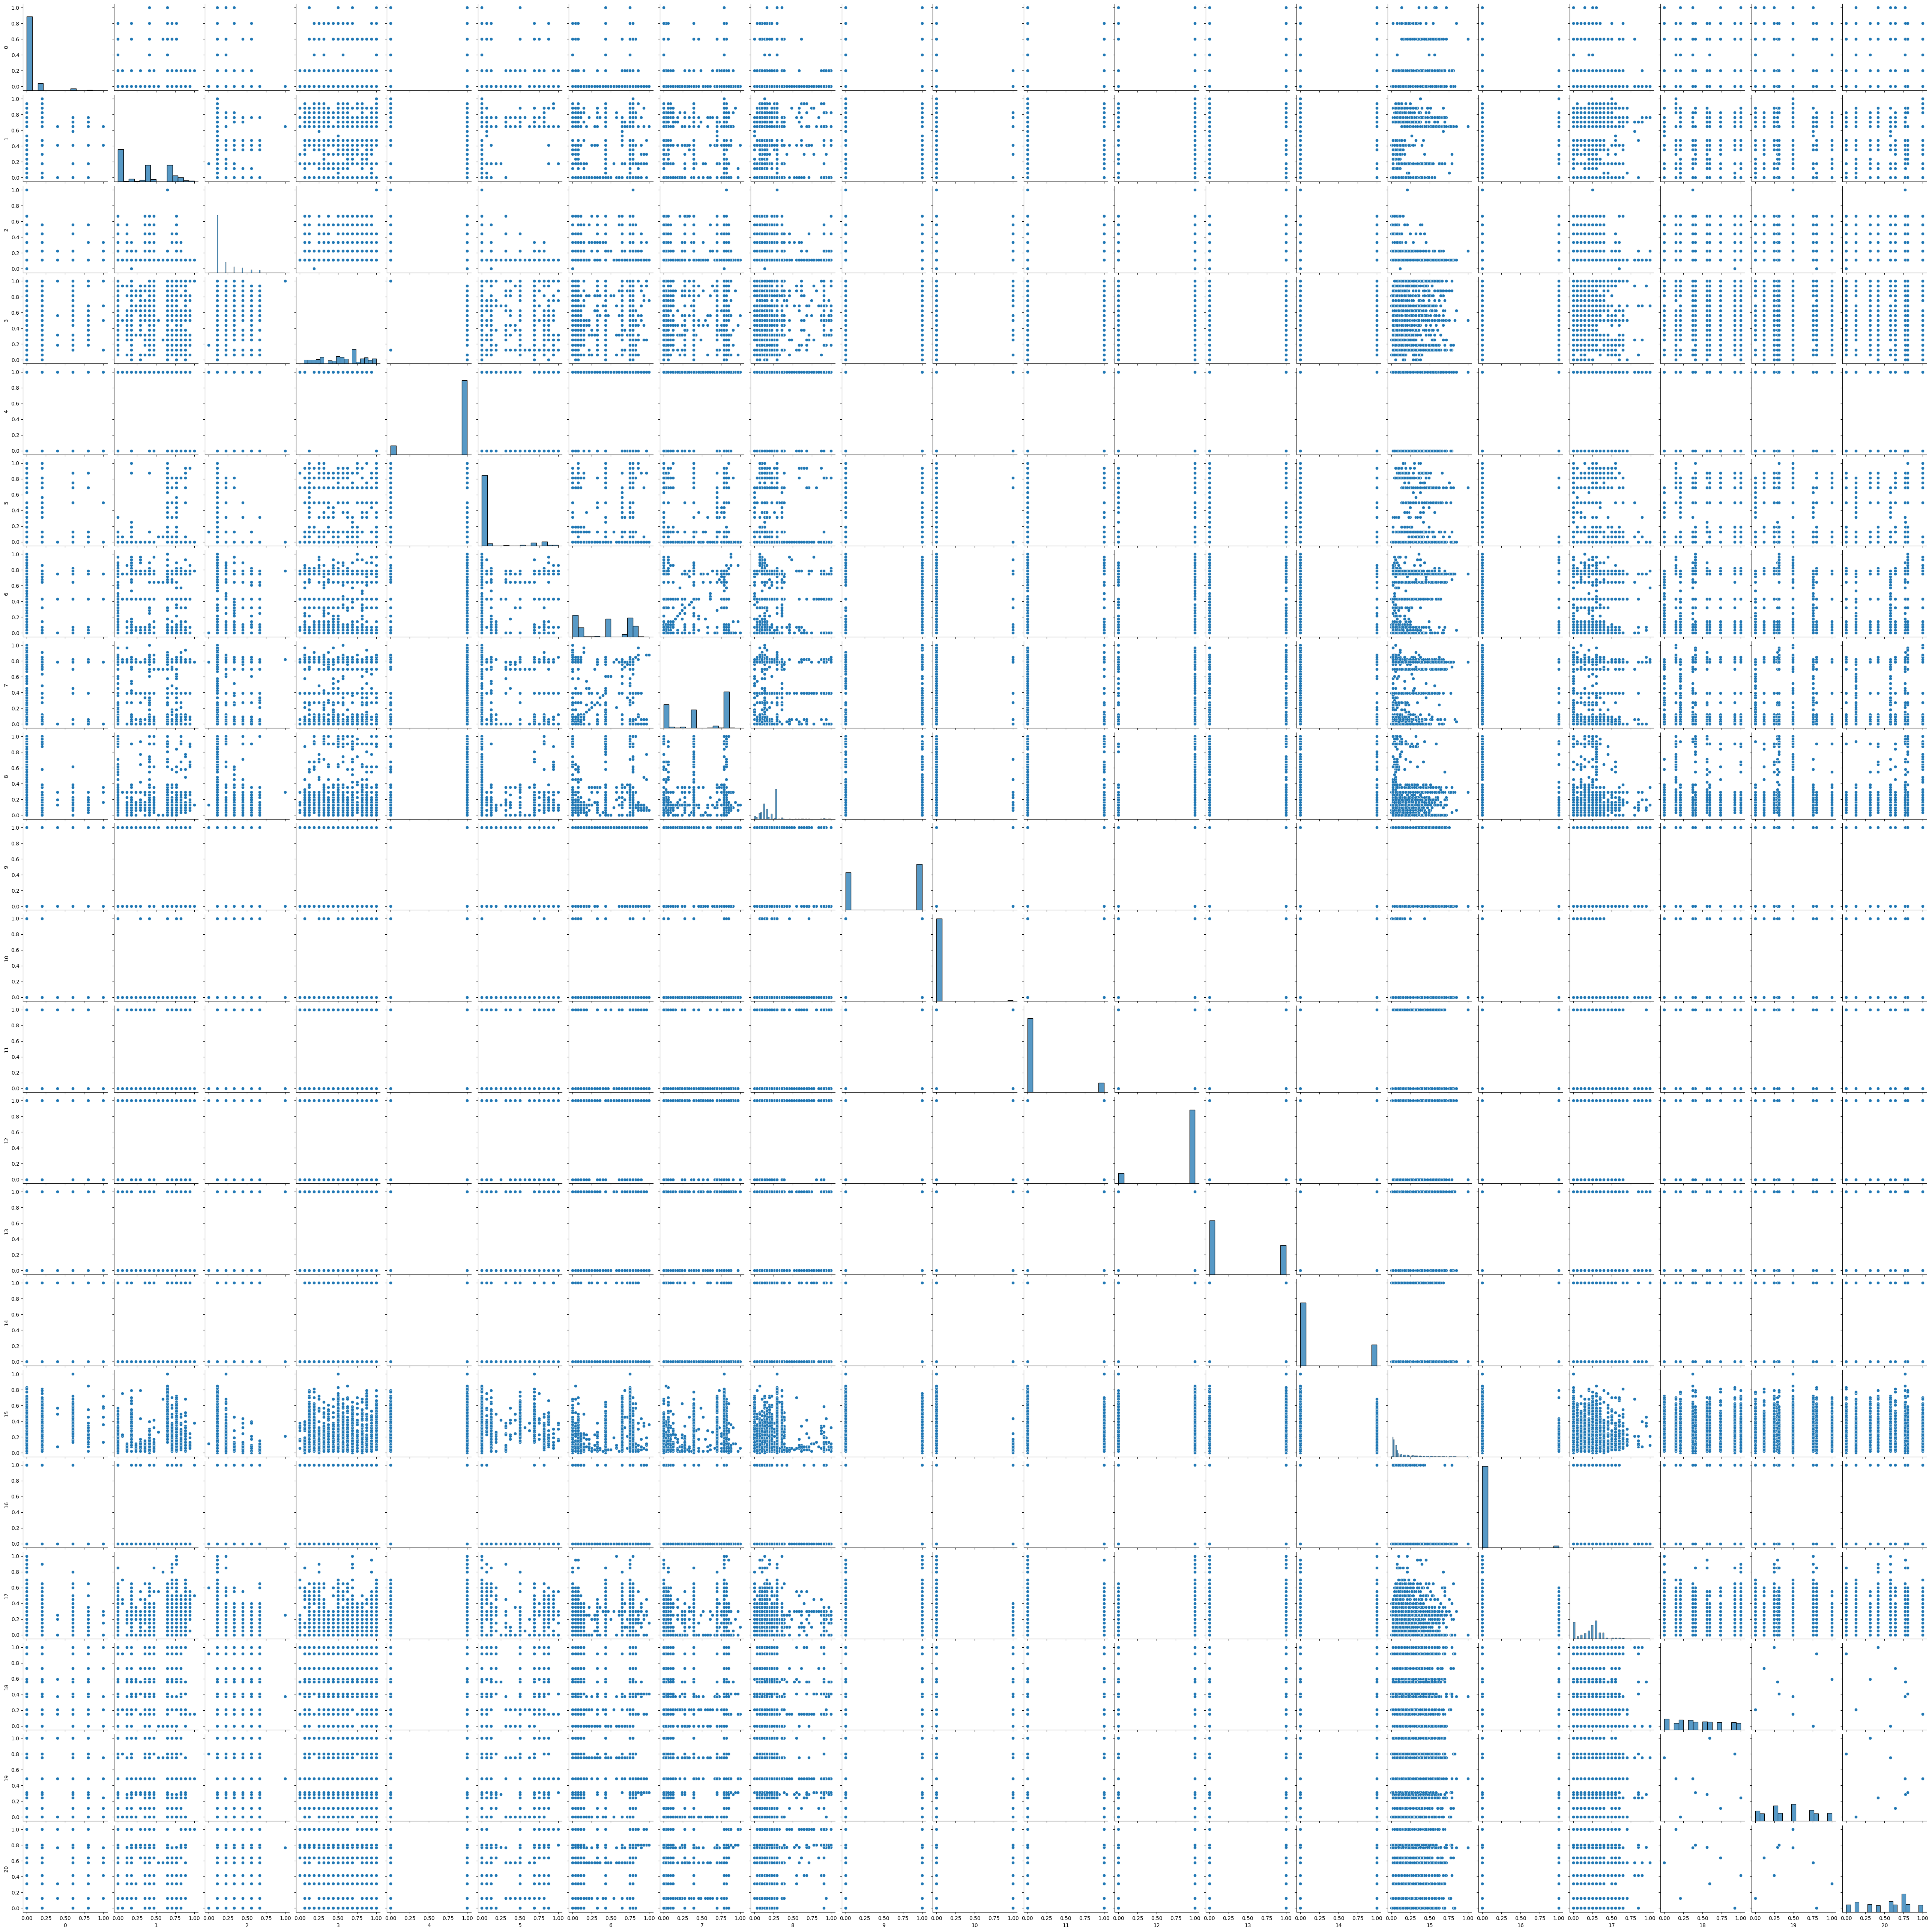

In [48]:
sns.pairplot(student_df_normalized) # Remove the column indexing

plt.show()

In [49]:
student_df['Target_encoded'] = student_df['Target'].astype('category').cat.codes

correlation_matrix = student_df[student_df_num_cols].corr()

In [50]:
student_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Displaced,...,Gender,Scholarship holder,Age,International,Curricular units 2nd sem (approved),Unemployment rate,Inflation rate,GDP,Target,Target_encoded
0,1,8,5,2,1,1,13,10,6,1,...,1,0,20,0,0,10.8,1.4,1.74,0,0
1,1,6,1,11,1,1,1,3,4,1,...,1,0,19,0,6,13.9,-0.3,0.79,2,2
2,1,1,5,5,1,1,22,27,10,1,...,1,0,19,0,0,10.8,1.4,1.74,0,0
3,1,8,2,15,1,1,23,27,6,1,...,0,0,20,0,5,9.4,-0.8,-3.12,2,2
4,2,12,1,3,0,1,22,28,10,0,...,0,0,45,0,6,13.9,-0.3,0.79,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,6,0,...,1,0,19,0,5,15.5,2.8,-4.06,2,2
4420,1,1,2,15,1,1,1,1,10,1,...,0,0,18,1,2,11.1,0.6,2.02,0,0
4421,1,1,1,12,1,1,22,27,10,1,...,0,1,30,0,1,13.9,-0.3,0.79,0,0
4422,1,1,1,9,1,1,22,27,8,1,...,0,1,20,0,5,9.4,-0.8,-3.12,2,2


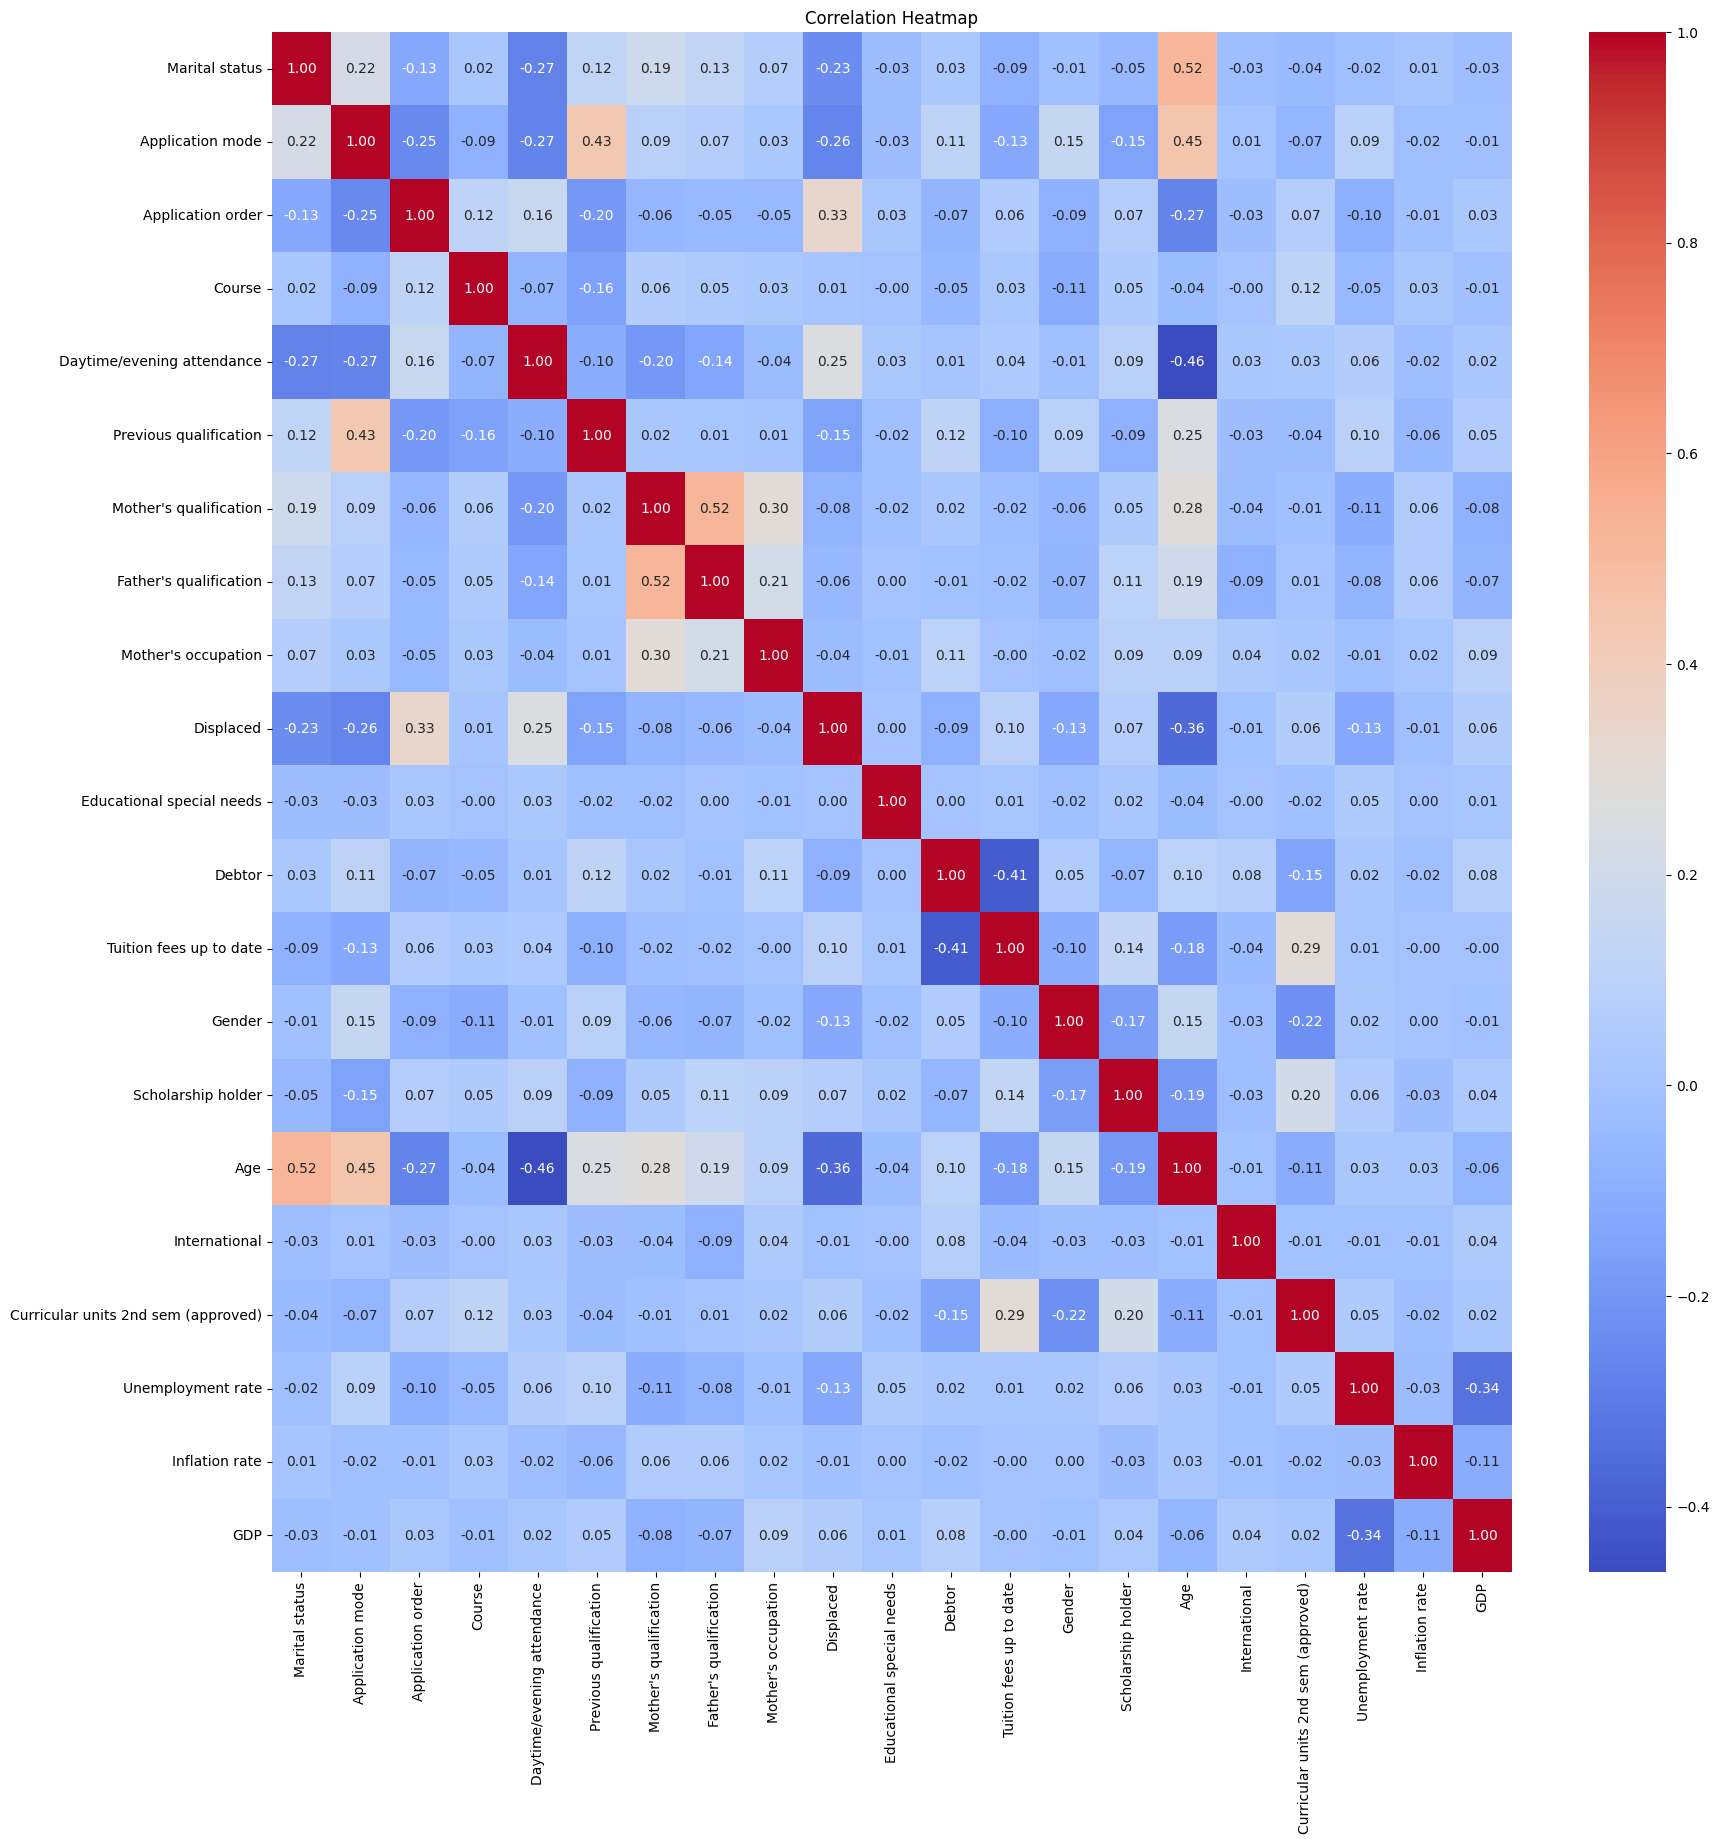

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [52]:
!pip install scipy --upgrade
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

!pip install dmba
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
from dmba import adjusted_r2_score, AIC_score, BIC_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 10.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 64.6 MB/s eta 0:00:00
Colab environment detected.


In [53]:
student_df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age', 'International', 'Curricular units 2nd sem (approved)',
       'Unemployment rate', 'Inflation rate', 'GDP', 'Target',
       'Target_encoded'],
      dtype='object')

In [54]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Marital status                       4424 non-null   int64  
 1   Application mode                     4424 non-null   int64  
 2   Application order                    4424 non-null   int64  
 3   Course                               4424 non-null   int64  
 4   Daytime/evening attendance           4424 non-null   int64  
 5   Previous qualification               4424 non-null   int64  
 6   Mother's qualification               4424 non-null   int64  
 7   Father's qualification               4424 non-null   int64  
 8   Mother's occupation                  4424 non-null   int64  
 9   Displaced                            4424 non-null   int64  
 10  Educational special needs            4424 non-null   int64  
 11  Debtor                        

#Logistic Regression

In [55]:
student_df.drop(student_df[student_df["Target"]==1].index, inplace=True)
student_df.loc[:,'Target'].value_counts()

,count
Target,
2,2209
0,1421


In [56]:
outcome = student_df['Target']
predictors = student_df.drop(['Target_encoded', 'Target'], axis=1)
X = predictors
y = outcome

In [57]:
student_df[['Target', 'Target_encoded']].value_counts()

,,count
Target,Target_encoded,
2,2,2209
0,0,1421


In [58]:
print(student_df[['Target', 'Target_encoded']].value_counts())

Target  Target_encoded
2       2                 2209
0       0                 1421
Name: count, dtype: int64


In [59]:
student_df.shape

(3630, 23)

In [60]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [61]:
X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Displaced,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age,International,Curricular units 2nd sem (approved),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,13,10,6,1,...,0,1,1,0,20,0,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,3,4,1,...,0,0,1,0,19,0,6,13.9,-0.3,0.79
2,1,1,5,5,1,1,22,27,10,1,...,0,0,1,0,19,0,0,10.8,1.4,1.74
3,1,8,2,15,1,1,23,27,6,1,...,0,1,0,0,20,0,5,9.4,-0.8,-3.12
4,2,12,1,3,0,1,22,28,10,0,...,0,1,0,0,45,0,6,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,6,0,...,0,1,1,0,19,0,5,15.5,2.8,-4.06
4420,1,1,2,15,1,1,1,1,10,1,...,1,0,0,0,18,1,2,11.1,0.6,2.02
4421,1,1,1,12,1,1,22,27,10,1,...,0,1,0,1,30,0,1,13.9,-0.3,0.79
4422,1,1,1,9,1,1,22,27,8,1,...,0,1,0,1,20,0,5,9.4,-0.8,-3.12


In [62]:
print(student_df.shape)
print(train_X.shape)
print(train_y.shape)
print(valid_y.shape)
valid_X.shape

(3630, 23)
(2541, 21)
(2541,)
(1089,)


(1089, 21)

In [63]:
student_df_lm = LogisticRegression()
student_df_lm.fit(train_X, train_y)

LogisticRegression()

In [64]:
student_df_lm.intercept_

array([-0.49460688])

In [65]:
student_df_lm.coef_

array([[ 0.32452796, -0.08100765, -0.07943105, -0.1169983 , -0.74306072,
        -0.00799121, -0.01708604,  0.00703287,  0.05197337, -0.10848217,
         0.08012875, -1.11710868,  2.31165073, -0.38790334,  1.02371448,
        -0.05475549,  0.35616369,  0.66343738, -0.05498996, -0.0273007 ,
         0.02127187]])

In [66]:
print(student_df_lm.predict(train_X))

[2 0 2 ... 2 2 2]


In [67]:
regressionSummary(train_y, student_df_lm.predict(train_X))


Regression statistics

               Mean Error (ME) : -0.0598
Root Mean Squared Error (RMSE) : 0.6963
     Mean Absolute Error (MAE) : 0.2424


In [68]:
regressionSummary(valid_y, student_df_lm.predict(valid_X))


Regression statistics

               Mean Error (ME) : -0.0294
Root Mean Squared Error (RMSE) : 0.6298
     Mean Absolute Error (MAE) : 0.1983


In [69]:
pred_y=student_df_lm.predict(train_X)
pred_y

array([2, 0, 2, ..., 2, 2, 2])

In [70]:
#adjusted_r2_score of the model using the trainig data set
adjusted_r2_score(train_y, pred_y, student_df_lm)

0.49010658316550226

In [71]:
Pred_valid = student_df_lm.predict(valid_X)
Pred_valid

array([2, 0, 2, ..., 0, 0, 2])

In [72]:
#adjusted_r2_score of the model using the validation data set
adjusted_r2_score(valid_y, Pred_valid, student_df_lm)

0.5849046935731157

In [73]:
student_df_lm_predict = student_df_lm.predict(valid_X)

In [74]:
result = pd.DataFrame({'predicted' : student_df_lm_predict ,
                       'actual' : valid_y,
                       'residual' : (valid_y - student_df_lm_predict)/valid_y })
result.head(5)

,predicted,actual,residual
200,2,2,0.0
1869,0,2,1.0
958,2,2,0.0
2043,2,2,0.0
4205,2,2,0.0


In [75]:
student_df_lm.score(train_X, train_y)

0.8787878787878788

In [76]:
# Evaluate performance on valid data
student_df_lm.score(valid_X, valid_y)

0.9008264462809917

In [79]:
# Import the necessary function
from sklearn.metrics import confusion_matrix

# Generate predictions on validation data
y_pred = student_df_lm.predict(valid_X)  # Assuming 'student_df_lm' is your fitted model

# Calculating the confusion matrix for the Logistic regression
cm_lr = confusion_matrix(valid_y, y_pred)

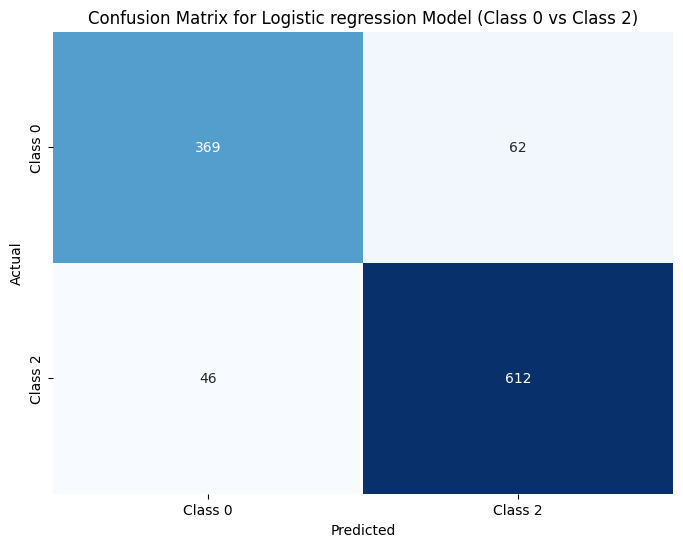

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.title('Confusion Matrix for Logistic regression Model (Class 0 vs Class 2)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [81]:
from sklearn.metrics import classification_report, confusion_matrix # Import confusion_matrix

In [82]:
# Calculating the accuracy of the model
print('Training Accuracy :',student_df_lm.score(train_X,train_y))
print('Valid Accuracy :',student_df_lm.score(valid_X,valid_y))

# Make predictions on the test data
y_pred = student_df_lm.predict(valid_X)



print('\nCLASSIFICATION REPORT\n')
print(classification_report(valid_y, y_pred))

# calculating confusion matrix
cm = confusion_matrix(valid_y, y_pred)

Training Accuracy : 0.8787878787878788
Valid Accuracy : 0.9008264462809917

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       431
           2       0.91      0.93      0.92       658

    accuracy                           0.90      1089
   macro avg       0.90      0.89      0.90      1089
weighted avg       0.90      0.90      0.90      1089



The text you provided contains a classification report for a model that predicts whether students graduate or drop out based on certain features. Here's a breakdown of the information in relation to students who graduated or dropped out:

1. Training and Validation Accuracy:
Training Accuracy: 0.8787 (87.87%): This indicates that the model correctly predicted the graduation or dropout status for about 87.87% of the students in the training dataset.
Validation Accuracy: 0.9008 (90.08%): This is the accuracy of the model when tested on a separate validation dataset, suggesting that the model correctly predicted the status for 90.08% of the students in that dataset.
2. Classification Report:
The classification report provides more detailed metrics, which are broken down by the classes—here, 0 and 2, which might represent dropout (0) and graduate (2) respectively.

Precision: The proportion of correct positive predictions.

For class 0 (dropouts), precision is 0.89, meaning 89% of the students predicted to drop out actually did drop out.
For class 2 (graduates), precision is 0.91, meaning 91% of the students predicted to graduate actually did graduate.
Recall: The proportion of actual positives that were correctly predicted.

For class 0 (dropouts), recall is 0.86, meaning 86% of all actual dropouts were correctly identified by the model.
For class 2 (graduates), recall is 0.93, meaning 93% of all actual graduates were correctly identified.
F1-Score: The harmonic mean of precision and recall, providing a balance between the two metrics.

For class 0, the F1-score is 0.87, indicating a good balance between precision and recall for predicting dropouts.
For class 2, the F1-score is 0.92, indicating an even better balance for predicting graduates.
Support: The number of actual occurrences of each class in the dataset.

There were 431 students who dropped out (class 0) and 658 students who graduated (class 2).
3. Overall Metrics:
Accuracy: The overall accuracy of the model on the validation dataset is 0.90, meaning it correctly classified 90% of the students.
Macro Average: This is the average of the precision, recall, and F1-score across both classes without considering the support (class size).
Weighted Average: This is the average of the metrics but takes into account the number of instances in each class, making it more representative of the overall performance.
In Summary:
This model is quite effective at predicting whether a student will graduate or drop out. It performs slightly better at predicting graduates (class 2) than dropouts (class 0), as indicated by the higher precision, recall, and F1-score for class 2. The overall accuracy is strong, suggesting that the model is reliable for making predictions on student outcomes.

#Decision Tree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier

In [84]:
decisiontree = DecisionTreeClassifier(random_state=1)
decisiontree.fit(train_X, train_y)

DecisionTreeClassifier(random_state=1)

In [85]:
pred_valid_dt = decisiontree.predict(valid_X)

In [86]:
# Calculating the confusion matrix for the Decision Tree model
cm_dt = confusion_matrix(valid_y, pred_valid_dt)

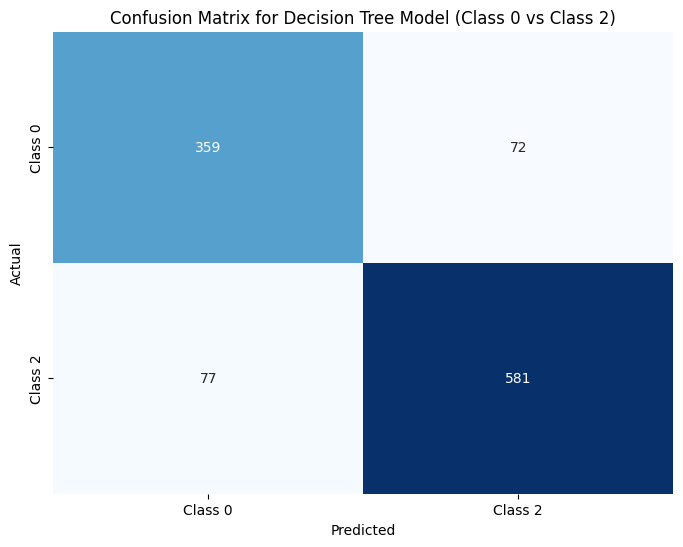

In [87]:
# Plotting the confusion matrix for the Decision Tree model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.title('Confusion Matrix for Decision Tree Model (Class 0 vs Class 2)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
classification_rep_dt = classification_report(valid_y, pred_valid_dt, target_names=['Class 0', 'Class 2'])
print("Classification Report:\n", classification_rep_dt)



Classification Report:
               precision    recall  f1-score   support

     Class 0       0.82      0.83      0.83       431
     Class 2       0.89      0.88      0.89       658

    accuracy                           0.86      1089
   macro avg       0.86      0.86      0.86      1089
weighted avg       0.86      0.86      0.86      1089



In [ ]:
from sklearn import tree

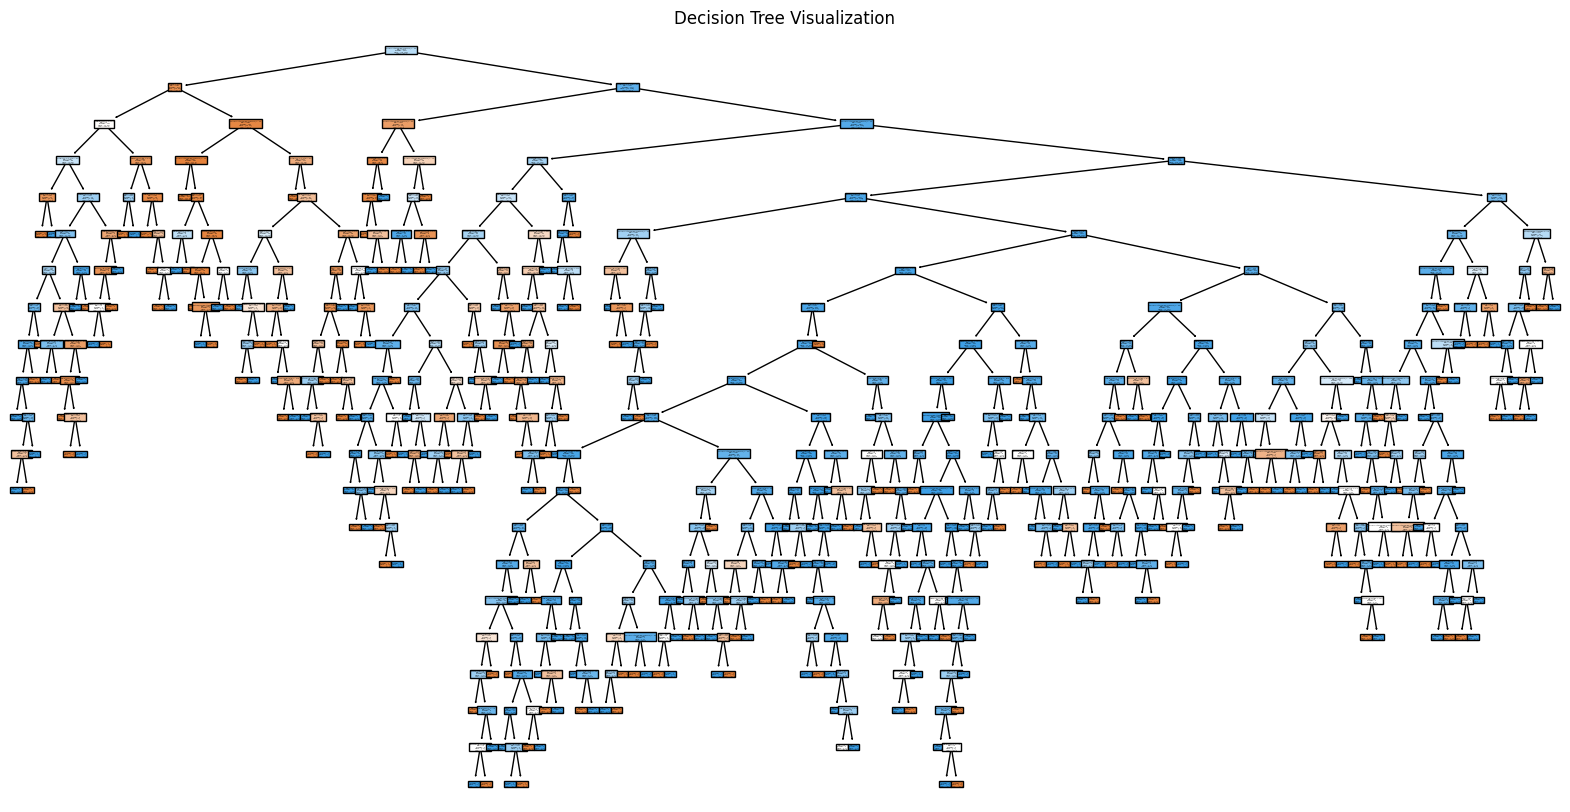

In [ ]:
# Visualizing the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(decisiontree, filled=True, feature_names=train_X.columns, class_names=['Class 0', 'Class 2'])
plt.title('Decision Tree Visualization')
plt.show()

#Random Forest Model

In [ ]:
!pip install scikit-learn
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
rf = RandomForestClassifier(random_state=1, n_estimators=700)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=700, random_state=1)

In [ ]:
rf.feature_importances_

array([0.00678032, 0.03632337, 0.02275887, 0.06751486, 0.00507781,
       0.01253448, 0.03048807, 0.03281552, 0.03760896, 0.01243417,
       0.00139996, 0.02379574, 0.08841032, 0.02502671, 0.03990511,
       0.06898963, 0.0021509 , 0.40267833, 0.02866902, 0.02566072,
       0.02897714])

In [ ]:
# Generating predictions on the validation set using the Random Forest model
pred_valid_rf = rf.predict(valid_X)

In [ ]:
# Calculating the confusion matrix for the Random Forest model
cm_rf = confusion_matrix(valid_y, pred_valid_rf)

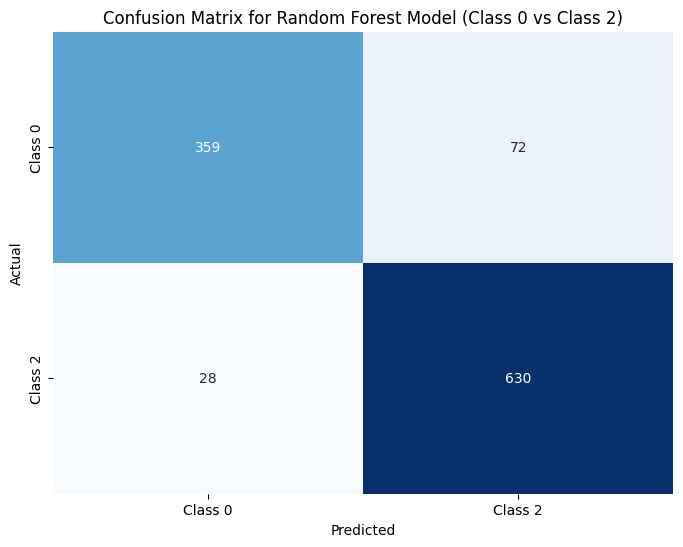

In [ ]:
# Plotting the confusion matrix for the Random Forest model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.title('Confusion Matrix for Random Forest Model (Class 0 vs Class 2)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Displaying the classification report for the Random Forest model
classification_rep_rf = classification_report(valid_y, pred_valid_rf, target_names=['Class 0', 'Class 2'])
print("Classification Report:\n", classification_rep_rf)

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.93      0.83      0.88       431
     Class 2       0.90      0.96      0.93       658

    accuracy                           0.91      1089
   macro avg       0.91      0.90      0.90      1089
weighted avg       0.91      0.91      0.91      1089



Random forest with best parameters

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:


# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']   # Number of features to consider when looking for the best split
}

In [ ]:
# Initialize the Random Forest model
rf_best = RandomForestClassifier(random_state=1)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_best, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


In [ ]:
# Fit the GridSearchCV to the training data
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters Found: ", best_params)

Best Parameters Found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

In [ ]:
# Generating predictions on the validation set using the best model
pred_valid_rf_best = best_model.predict(valid_X)

In [ ]:
# Calculating the confusion matrix for the tuned Random Forest model
cm_rf_best = confusion_matrix(valid_y, pred_valid_rf_best)

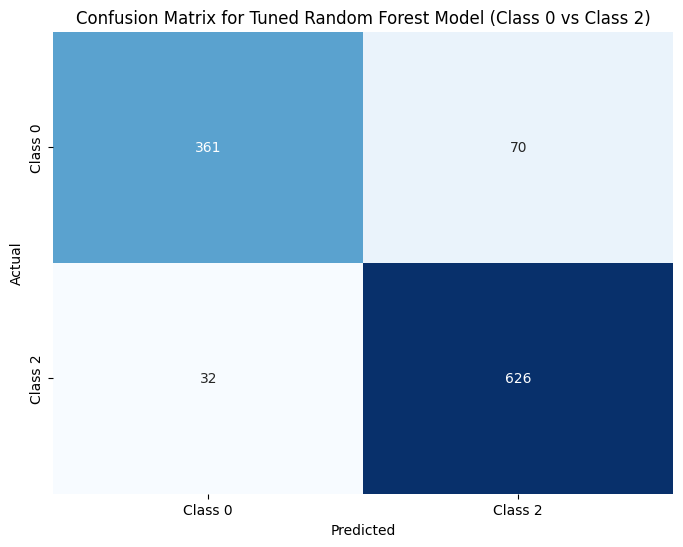

In [ ]:
# Plotting the confusion matrix for the tuned Random Forest model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_best, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.title('Confusion Matrix for Tuned Random Forest Model (Class 0 vs Class 2)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Displaying the classification report for the tuned Random Forest model
classification_rep_rf_best = classification_report(valid_y, pred_valid_rf_best, target_names=['Class 0', 'Class 2'])
print("Classification Report:\n", classification_rep_rf_best)


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.92      0.84      0.88       431
     Class 2       0.90      0.95      0.92       658

    accuracy                           0.91      1089
   macro avg       0.91      0.89      0.90      1089
weighted avg       0.91      0.91      0.91      1089



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Calculate the accuracy for each model (already computed in the previous comparison)
logistic_accuracy = accuracy_score(valid_y, y_pred)
decision_tree_accuracy = accuracy_score(valid_y, pred_valid_dt)
random_forest_accuracy = accuracy_score(valid_y, pred_valid_rf)
best_rf_accuracy = accuracy_score(valid_y, pred_valid_rf_best)

# Print the accuracy scores
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")
print(f"Decision Tree Accuracy: {decision_tree_accuracy:.2f}")
print(f"Random Forest Accuracy: {random_forest_accuracy:.2f}")
print(f"Tuned Random Forest Accuracy: {best_rf_accuracy:.2f}")

Logistic Regression Accuracy: 0.90
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.91
Tuned Random Forest Accuracy: 0.91
